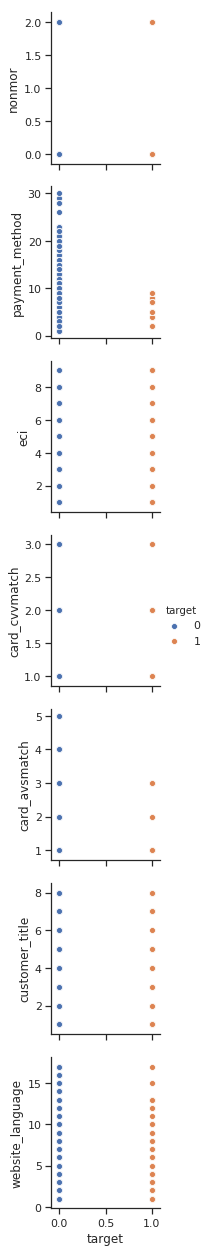

In [70]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib as plt
%matplotlib inline

sampler = RandomUnderSampler({1: 2570 , 0: 50000}, random_state=16)

X, y = sampler.fit_sample(df, df.target)
X=pd.DataFrame(X, columns=df.columns)


In [33]:
from sklearn.decomposition import PCA, KernelPCA
pca=PCA(n_components=2, random_state=26)
pca_out=pca.fit_transform(X)

print(pca.explained_variance_ratio_)  

[0.94381501 0.05392408]


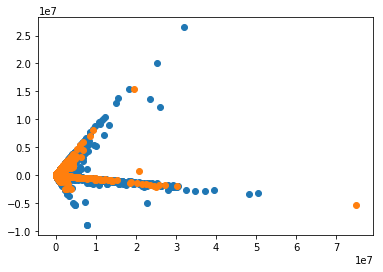

In [34]:
pca_test=pca.transform(X_test)
# pca_out=pca.transform(df[all_cols])
plt.scatter(pca_test[:,0],pca_test[:,1])
# plt.scatter(pca_out[:,0],pca_out[:,1],c=df.target,camp=blue)

pca_test=pca.transform(X)
# pca_out=pca.transform(df[all_cols])
plt.scatter(pca_test[:,0],pca_test[:,1])
# plt.scatter(pca_out[:,0],pca_out[:,1],c=df.target,camp=blue)



In [43]:
probs=model.predict_proba(df[all_cols].as_matrix)
predictions=pd.DataFrame(probs)

KeyboardInterrupt: 

In [94]:
y_pred=predictions.iloc[:,1].apply(lambda x: 1 if x>=0.88 else 0 )

print(f1_score(y_true=df.target, y_pred=y_pred, average=None))
print(precision_score(y_true=df.target, y_pred=y_pred, average=None))
print(recall_score(y_true=df.target, y_pred=y_pred, average=None))

[0.99934399 0.67395591]
[0.99950223 0.62479229]
[0.9991858  0.73151751]


# Precision-Recall curve

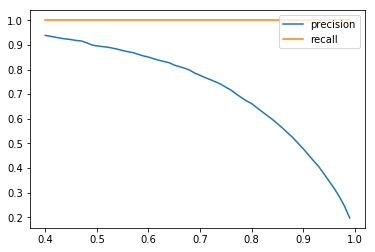

In [47]:
p=[]
r=[]
ts=[]

thresholds=np.arange(0.40, 1.00, 0.01)

y_true=target

for thres in thresholds:
    y_pred=predictions.iloc[:,1].apply(lambda x: 1 if x>=thres else 0 )
    p1=precision_score(y_true=y_true, y_pred=y_pred, average=None)
    r1=recall_score(y_true=y_true, y_pred=y_pred, average=None)
    
    
    p.append(p1[1])
    r.append(r1[1])
    ts.append(thres)

plt.plot(ts,p,label='precision')    
plt.plot(ts,r,label='recall')    
plt.legend(loc='upper right')    

In [95]:
from sklearn.externals import joblib
joblib.dump(cb_clf, new_model, compress=3)

['fraudModelv1.2.pkl']